

# NLP Project: Sentimental Analysis of IMDB reviews (Comparative Study)
## Aakash K O
## AM.EN.U4CSE17001

### Importing Libraries

In [ ]:
!pip install tf-nightly
import tensorflow_datasets as tfds
import tensorflow as tf

### Loading dataset and splitting the dataset into test set and train set

In [ ]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5OXFTK/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5OXFTK/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete5OXFTK/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

{'test': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'train': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>,
 'unsupervised': <PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>}

In [ ]:
encoder = info.features['text'].encoder

In [ ]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [ ]:
sample_string = 'Hello World.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 2307, 1829, 7975]
The original string: "Hello World."


In [ ]:
assert original_string == sample_string

In [ ]:
for index in encoded_string:
  print('{} -----> {}'.format(index, encoder.decode([index])))

4025 -----> Hell
222 -----> o 
2307 -----> Wor
1829 -----> ld
7975 -----> .


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

#Simple RNN Model

### Creating the model.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

### Compiling the model.

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

### Training the model.

In [ ]:
history = model.fit(train_dataset, epochs=3,
                    validation_data=test_dataset, 
                    validation_steps=30)
test_loss, test_acc = model.evaluate(test_dataset)

Epoch 1/3
391/391 [==============================] - 185s 471ms/step - loss: 0.6938 - accuracy: 0.5035 - val_loss: 0.6933 - val_accuracy: 0.4917
Epoch 2/3
391/391 [==============================] - 182s 464ms/step - loss: 0.6927 - accuracy: 0.4989 - val_loss: 0.6934 - val_accuracy: 0.4917
Epoch 3/3
391/391 [==============================] - 41s 104ms/step - loss: 0.6931 - accuracy: 0.5000


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 536,321
Trainable params: 536,321
Non-trainable params: 0
_________________________________________________________________


### Checking Test loss and Test Accuracy of the model.

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 41s 104ms/step - loss: 0.6931 - accuracy: 0.5000
Test Loss: 0.6930578947067261
Test Accuracy: 0.5


### Sample predictions to check whether the sentiments are classified either as a positive comment or negative.
If the prediction is >= 0.5, comment is positive else it is negative.

In [ ]:
def pad_to_size(vec, size):
  zeros=[0]*(size-len[vec])
  vec.extend[zeros]
  return vec

In [ ]:
def sample_predict(sample_pred_text,model3,pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text,64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model3.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions) 

In [ ]:
#predict on a sample test with negative comment.

sample_pred_text = ('The movie was not good. '
                    'It ruined our mood.')
predictions = sample_predict(sample_pred_text, model, pad=False)
print(predictions)

[[-0.01500041]]


In [ ]:
#predict on a sample test with positive comment.

sample_pred_text = ('The movie was very good. '
                    'We enjoyed it.')
predictions1 = sample_predict(sample_pred_text, model, pad=False)
print(predictions1)

[[0.04755548]]


### Visualizing the accuracy and loss of the Simple RNN model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric,'val_'+metric])
  plt.show()

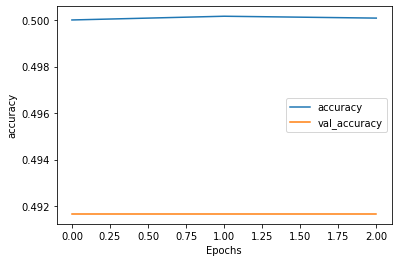

In [ ]:
plot_graphs(history, 'accuracy')

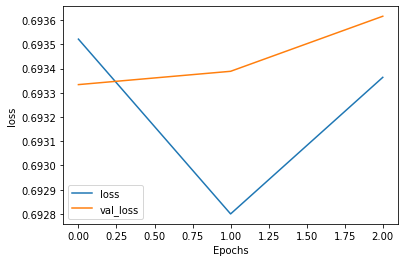

In [ ]:
plot_graphs(history, 'loss')

#LSTM

### Creating the model and compiling it.

In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

### Training the model.

In [ ]:
history1 = model1.fit(train_dataset, epochs=3,
                    validation_data=test_dataset, 
                    validation_steps=30)
test_loss, test_acc = model1.evaluate(test_dataset)

Epoch 1/3
391/391 [==============================] - 763s 2s/step - loss: 0.6867 - accuracy: 0.5117 - val_loss: 0.4906 - val_accuracy: 0.7750
Epoch 2/3
391/391 [==============================] - 756s 2s/step - loss: 0.3920 - accuracy: 0.8319 - val_loss: 0.3432 - val_accuracy: 0.8573
Epoch 3/3
391/391 [==============================] - 172s 441ms/step - loss: 0.3345 - accuracy: 0.8722


In [ ]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


### Checking Test loss and Test Accuracy of the model.

In [ ]:
test_loss, test_acc = model1.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 175s 448ms/step - loss: 0.3345 - accuracy: 0.8722
Test Loss: 0.3344869911670685
Test Accuracy: 0.872160017490387


### Sample predictions to check whether the sentiments are classified either as a positive comment or negative.
If the prediction is >= 0.5, comment is positive else it is negative.

In [ ]:
#predict on a sample test with negative comment.

sample_pred_text = ('The movie was not good. '
                    'It ruined our mood.')
predictions = sample_predict(sample_pred_text, model1, pad=False)
print(predictions)

[[-0.01500041]]


In [ ]:
#predict on a sample test with positive comment.

sample_pred_text = ('The movie was very good. '
                    'We enjoyed it.')
predictions2 = sample_predict(sample_pred_text,model1, pad=False)
print(predictions2)

[[0.5710926]]


### Visualizing the accuracy and loss of the LSTM model

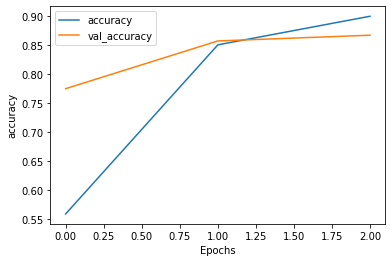

In [ ]:
plot_graphs(history1, 'accuracy')

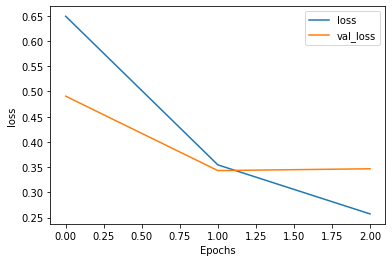

In [ ]:
plot_graphs(history1, 'loss')

#GRU

### Creating the model and compiling it.

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

### Training the model.

In [ ]:
history2 = model2.fit(train_dataset, epochs=3,
                    validation_data=test_dataset, 
                    validation_steps=30)
test_loss, test_acc = model2.evaluate(test_dataset)

Epoch 1/3
391/391 [==============================] - 736s 2s/step - loss: 0.6926 - accuracy: 0.5009 - val_loss: 0.6846 - val_accuracy: 0.4917
Epoch 2/3
391/391 [==============================] - 749s 2s/step - loss: 0.5488 - accuracy: 0.6568 - val_loss: 0.3733 - val_accuracy: 0.8260
Epoch 3/3
391/391 [==============================] - 142s 363ms/step - loss: 0.3661 - accuracy: 0.8696


In [ ]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               49920     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 582,081
Trainable params: 582,081
Non-trainable params: 0
_________________________________________________________________


### Checking Test loss and Test Accuracy of the model.

In [ ]:
test_loss, test_acc = model2.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 143s 365ms/step - loss: 0.3661 - accuracy: 0.8696
Test Loss: 0.3660981357097626
Test Accuracy: 0.8695999979972839


### Sample predictions to check whether the sentiments are classified either as a positive comment or negative.
If the prediction is >= 0.5, comment is positive else it is negative.

In [ ]:
#predict on a sample test with negative comment.

sample_pred_text = ('The movie was not good. '
                    'It ruined our mood.')
predictions = sample_predict(sample_pred_text, model2, pad=False)
print(predictions)

[[-0.3770592]]


In [ ]:
#predict on a sample test with positive comment.

sample_pred_text = ('The movie was very good. '
                    'We enjoyed it.')
predictions3 = sample_predict(sample_pred_text, model2, pad=False)
print(predictions3)

[[1.0029923]]


### Visualizing the accuracy and loss of the GRU model

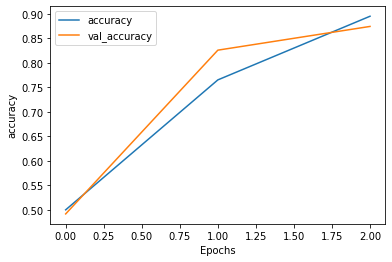

In [ ]:
plot_graphs(history2, 'accuracy')

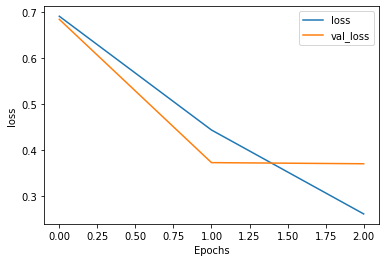

In [ ]:
plot_graphs(history2, 'loss')